### CPSC 303, Winter 2, 2023
# Assignment 3 - Due Monday February 27, 2pm {-}

Please show all your work. Use a Jupyter notebook with Python 3 kernel for the submission. You can add on to this notebook, uploaded in [https://canvas.ubc.ca/courses/106362/files/folder/Assignments/Assignment3](https://canvas.ubc.ca/courses/106362/files/folder/Assignments/Assignment3), or create your own.   
Before submitting please use 'Kernel/Restart\& Clear Output' from the drop down menu and afterwards run each cell once and look at the output before submitting to check everything runs correctly. Then export the notebook as a PDF and submit it to Gradescope. Ensure that you properly select the correct pages for each question. Also submit the notebook itself to Canvas. 
  
*Note 1: If you didn't do some exercise another one relies on as input (e.g. didn't do 1a, but need it for 3a) , you can use a built-in method or solve per hand to get the necessary data to continue.*

### 1. Linear piecewise interpolation {-}

So far, we have only looked at the built-in implementations of piecewise interpolation. Do not use these for this assignment but build your own (You can use scipy.interpolate.interp1d or others if you want to check your solution against it).

**(a)** (3 points) Implement a piecewise linear interpolation function that takes as input arrays $xs$ and $ys$ of length $n+1$ which hold the data pairs $(x_i,y_i)$, i=0,...,n and an array of evaluation points $x_{eval}$ and returns the linear interpolation function values, $v(x_{eval})= y_{eval}$ as output. Assume $xs$ is sorted as $xs[0] <xs[1]<...<xs[n]$.

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import bisect

def piecewise_linear(xs,ys,x_eval):
    # piecewise_linear constructs a linear interpolation from the data points (xs[i],ys[i])
    # input: xs - array of length n+1, holding abscissae
    #        ys - array of length n+1, holding values f(xs[i])
    #        x_eval - array of arbitrary length, holding evaluation points
    # output: y_eval - array of same length as x_eval, holding function values v(x_eval)
    
    y_eval = [0]*len(x_eval)
    for i, x in enumerate(x_eval):
        pos = bisect.bisect_left(xs, x)
        slope = (ys[pos] - ys[pos-1])/(xs[pos] - xs[pos-1])
        intercept = ys[pos] - slope*xs[pos]
        #print(f'pos: {pos}, slope: {slope}, intercept: {intercept}, y: {ys[pos]}, x: {xs[pos]}, y-: {ys[pos-1]}, x-: {xs[pos-1]}')
        y_eval[i] = slope*x + intercept
    return y_eval

**(b)** (2 points) Construct a piecewise linear interpolation $v(x)$ for the function $f(x) = 1/x$ on the interval $[0,100]$ using your code from above. Use the abscissae $x_{absc}=[1,2,4,...81,100]$ as given below. Evaluate and plot $f(x)$ and $v(x)$ on 1000 equidistant data points on the interval $[0,100]$ and compute the maximum error among these points.

max error: 0.2499898088133382


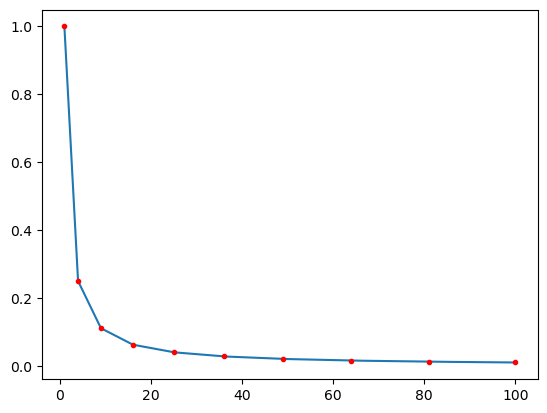

In [29]:
import scipy.interpolate as interp
x_absc = np.linspace(1,10,10)**2

def f(x):
    return 1/x

# your code for the interpolation, plot, and maximum 
y_absc = f(x_absc)
x_evals = np.linspace(1,100,1000)
y_evals = piecewise_linear(x_absc, y_absc, x_evals)
ys = f(x_evals)
error = ys - y_evals
plt.plot(x_evals, y_evals)
plt.plot(x_absc, y_absc, '.', color='red')
plt.show
print(f'max error: {max(abs(error))}')
#print(2/x_absc**3)

**(c)** (2 points) What is the best theoretical error bound for the approximation $v(x)$ to $f(x)$ in (b)?

For a piecewise linear interpolation, error is bounded by: $\lvert f(x) - v(x)\rvert \leq \frac{f''(\xi)}{2}(\frac{t_i - t_{i-1}}{2})^2$

$h$ for this problem is the interval length for each interval, which is: 

$f(x) = \frac{1}{x}, f'(x) = \frac{-1}{x^2}, f''(x) = \frac{2}{x^3}$

on the interval [1,4], $f''(x)$ reaches a max of 2 at x = 1

on the interval [4,9], $f''(x)$ reaches a max of 3.1E-2 at x = 4

on the interval [9,16], $f''(x)$ reaches a max of 2.7E-3 at x = 9

on the interval [16,25], $f''(x)$ reaches a max of 4.9E-4 at x = 16

on the interval [25,36], $f''(x)$ reaches a max of 1.3E-4 at x = 25

on the interval [36,49], $f''(x)$ reaches a max of 4.3E-5 at x = 36

on the interval [49,64], $f''(x)$ reaches a max of 1.7E-5 at x = 49

on the interval [64,81], $f''(x)$ reaches a max of 7.6E-6 at x = 64

on the interval [81,100], $f''(x)$ reaches a max of 3.8E-6 at x = 81

Combining, we get that the maximum bound is found on the interval [1,4] and is $\frac{9}{4} = 2.25$

### 2. Hermite Cubics {-}

The set $b(x)$ of 4 Hermite cubic basis functions with their coefficients $f(x_0),f(x_1),f'(x_0),f'(x_1)$ on interval $x \in [0,1]$ with $x_0 = 0$ and $x_1 = 1$ can also be written in terms of Bernstein Polynomials $B_{n,j}$,
\begin{equation*} 
B_{n,j}(x) =  \binom{n}{k} x^j (1-x)^{n-j}, 
\end{equation*}
with degree $n=3$ as
\begin{equation*}
b(x) = f(x_0) B_{3,0}(x) + \left ( f(x_0) + \frac{1}{3} f'(x_0) \right ) B_{3,1}(x) + \left ( f(x_1) -\frac{1}{3} f'(x_1) \right ) B_{3,2}(x) + f(x_1) B_{3,3}(x).
\end{equation*}

**(a)** (3 points) Verify that this form corresponds to the expression using mother Hermite cubic functions defined on Slide 49 and 51 of Chapter 11.   
*Hint: The second halfs of the mother functions have to be translated from the interval $[-1,0]$ to $[0,1]$ to get all four functions on one interval.*

$B_{3,0} = \binom{3}{0} x^0 (1-x)^{3} = (1-x)^3 = 1-3x+3x^2-x^3$

$B_{3,1} = \binom{3}{1} x^1 (1-x)^{2} = 3x(1-x)^2 = 3x - 6x^2 + 3x^3$

$B_{3,2} = \binom{3}{2} x^2 (1-x)^{1} = 3x^2(1-x) = 3x^2 - 3x^3$

$B_{3,3} = \binom{3}{3} x^3 (1-x)^{0} = x^3$

$b(x) = f(x_0)(1-3x+3x^2-x^3) + (f(x_0) + \frac{1}{3}f'(x_0))(3x - 6x^2 + 3x^3) + (f(x_1)-\frac{1}{3}f'(x_1))(3x^2 - 3x^3) + f(x_1)x^3$

$ = f(x_0)(1-3x^3+2x^3)+ f'(x_0)(x-2x^2+x^3) + f(x_1)(3x^2-2x^3) + f(x_1)(x^3 - x^2)$

which correspond to the mother functions.

**(b)** (3 points) We will denote the coefficients for the Bernstein Polynomials as $c_0 = f(x_0), c_1 = f(x_0)+\frac{1}{3}f'(x_0), c_2 = f(x_1)-\frac{1}{3}f'(x_1), c_3 = f(x_1)$. Write an algorithm to evaluate $b(x)$ with $x \in [0,1]$ for an array of evaluation points $x_{eval}$ with the 4 given data values $c = [c_0,c_1,c_2,c_3]$.

In [37]:
def b(c,x_eval):
    # input: y - array with 4 coefficients for the Hermite Cubic, ordered c = [c_0,c_1,c_2,c_3]
    #        x_eval - array of arbitrary length of evalulation points on the interval [0,1]
    # output: y_eval - array of same length as x_eval with function values b(x_eval) = y_eval.
    
    # your code
    y_eval = [0]*len(x_eval)
    for i, x in enumerate(x_eval):
        y_eval[i] = c[0]*(1 - 3*x + 3*x**2 - x**3) + c[1]*(3*x - 6*x**2 + 3*x**3) + c[2]*(3*x**2 - 3*x**3) + c[3]*(x**3)
    return y_eval

**(c)** (2 points) The full piecewise Hermite cubic polynomial is $$ v(x) = \sum_{k=0}^r b_k(x)$$, with $b_k(x)$ being translations and scalings of the terms in $b(x)$ onto the intervals $[x_k,x_{x+1}]$. What is the correct expression for $b_k(x)$ on the interval $[x_k,x_{k+1}]$ in terms of the Bernstein polynomials $B_{3,j}(x)$, $j=0,...3$?   
*Hint: The correct scalings and translations for $\xi_k(x)$ and $\eta_k(x)$ on Slide 51, Chapter 11, are detailed in the Book, page 478.*

$b(x) = f(x_0) B_{3,0}(x) + \left ( f(x_0) + \frac{1}{3} f'(x_0) \right ) B_{3,1}(x) + \left ( f(x_1) -\frac{1}{3} f'(x_1) \right ) B_{3,2}(x) + f(x_1) B_{3,3}(x)$


$b_k(x) = (\frac{x-t_k}{t_{k+1} - t_k})f(x_0) B_{3,0}(x) + \left ((\frac{x-t_k}{t_{k+1} - t_k})f(x_0) + \frac{1}{3}(x-t_k)f'(x_0) \right ) B_{3,1}(x) + \left ( (\frac{x-t_k}{t_{k+1} - t_k})f(x_1) -\frac{1}{3} (x-t_k)f'(x_1) \right ) B_{3,2}(x) + (\frac{x-t_k}{t_{k+1} - t_k})f(x_1) B_{3,3}(x)$


**(d)** (3 points) Write an algorithm to evaluate the piecewise Hermite Cubic polynomial $v(x)$ with  $x \in [x_0,x_r]$ using <tt>b(c,x_eval)</tt> from (b), given the data set $xs = [x_0,x_1,...,x_r]$, $ys = [f(x_0),f(x_1),...,f(x_r)]$, and $dys = [f'(x_0),f'(x_1),...,f'(x_r)]$ with $x_0 = a$, $x_r = b$ for an array of evaluation points $x_{eval}$. Plot the resulting function for the given data set $xs,ys,dys$ on the interval $[xs[0],xs[r]]$ for at least 100 evaluation points.

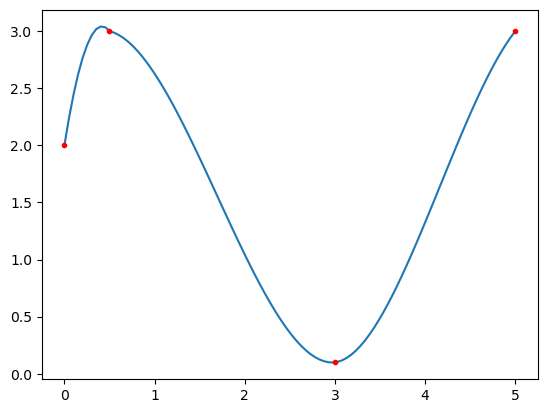

In [104]:
def piecewise_hermite(x,y,dy,x_eval):
    # input: xs - array of r+1 data points
    #        ys - array of r+1 function values ys[i] = f(xs[i])
    #        dys - array of r+1 function derivatives dys[i] = f'(xs[i])
    #        x_eval - array of arbitrary length of evalulation points on the interval [xs[0],xs[r+1]]
    # output: y_eval - array of same length as x_eval, with values of the interpolant v(x_eval) = y_eval
    
    #! use function b(c,x)
    # your code
    
    def return_c(y,dy,pos):
        #modifier = (1/(x[pos] - x[pos-1]))
        return [y[pos-1], y[pos-1] + (1/3)*dy[pos-1], y[pos] - (1/3)*dy[pos], y[pos]]
    
    y_eval = []
    for i, this_x in enumerate(x[:-1],1):
        x_split = [gen_x for gen_x in x_eval if (gen_x >= x[i-1] and gen_x <= x[i])]
        x_split = (x_split - x[i-1])/(x[i] - x[i-1])
        this_piece = b(return_c(y,dy,i), x_split)
        y_eval += this_piece
    return y_eval

x = np.asarray([0,0.5,3,5])
y = np.asarray([2,3,0.1,3])
dy = np.asarray([2.5,-0.5,0.2,2])

# plot the resulting piecewise polynomial for the given data

xs = np.linspace(x[0],x[-1],100)
ys = piecewise_hermite(x,y,dy,xs)
plt.plot(xs, ys)
plt.plot(x,y, '.', color='r')

### 3. Parametric Interpolation & Bezier Curves {-}

**(a)** (3 points) Now we want to draw a parametric curve. For this, we are given a set of data points $cx$ and $cy$ in a specific order. Use your linear interpolation code from Exercise 1 to construct a linear 2d curve interpolation. Test it for the given data $cx$ and $cy$ by plotting the interpolant with parameter value $t \in [0,1]$ at min. 100 parameter points and plot a scatter plot of the data points with markers ('ro') in the same figure.

<function matplotlib.pyplot.show(close=None, block=None)>

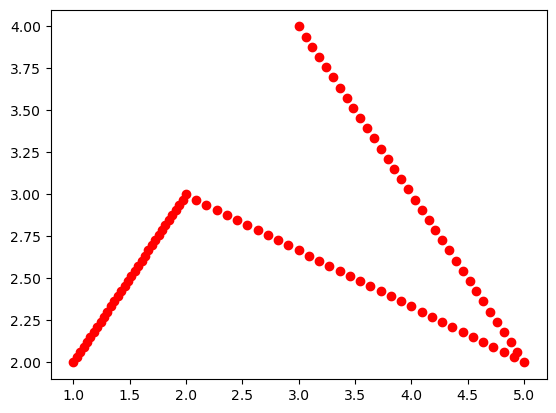

In [119]:
# Given data points, to be interpolated in the given order
cx = np.asarray([1.0,2.0,5.0,3.0])
cy = np.asarray([2.0,3.0,2.0,4.0])

# use piecewise_linear to make a parametric interpolation of the data
# plot the resulting linear interpolation curve, evaluated at min. 100 points

t = np.linspace(0,1,4)
tau = np.linspace(0,1,100)
yxs = piecewise_linear(t,cx,tau)
yys = piecewise_linear(t,cy,tau)
#print(yxs, yys)

plt.plot(yxs,yys, 'ro')
plt.show

**(b)** (3 points) The points given above are data points and guide points, given as $cx = [x_0, x_0+\alpha_0, x_1-\alpha_1, x_1]$ and $cy = [y_0,y_0+\beta_0,y_1-\beta_1,y1]$ for a Bezier curve interpolation, we will denote with $h_0$. Note the relationship between the guide points, the coefficients for the Bernstein polynomials and the function derivatives as defined in Exercise 2(a).   
Plot the Hermite cubic interpolating curve $h_0$ for the data points and guide points $cx$, $cy$ as given in (a) using your function <tt>b(c,x_eval)</tt> defined in 2(b). Also plot the piecewise linear interpolation of the guide points on top of it.

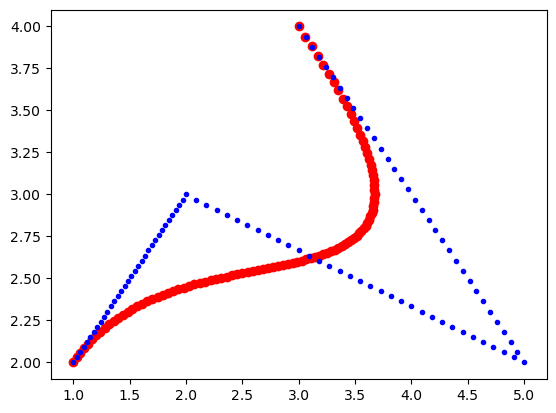

In [120]:
# your code
tau = np.linspace(0,1,100)
xx = b(cx, tau)
yy = b(cy, tau)

plt.plot(xx, yy, 'ro', yxs, yys, 'b.')

**(c)** (3 points) We want to connect the curve $h_0$ from (b) with another Bezier curve $h_2$. For the curve $h_2$ two additional data points and guide points are given to you, $cx2 = [x_2,x_2+\alpha_2, x_3-\alpha_3, x_3]$ and $cy2 = [y_2,y_2+\beta_2, y_3 - \beta_3, y_3]$. For the connection we need an additional Bezier curve $h_1$ on the interval $[x_1,x_2]$. Specify the correct guide points for it and plot all three of them together in a plot using the function <tt>b(c,x_eval)</tt> or specify the correct derivatives to use the function <tt>piecewise_hermite(x,y,dy,x_eval)</tt> to draw all three curve segments together in a plot.


cx1 = [x1, x1 + a1, x2 - a2, x2]
cy1 = [y1, y1 + b1, y2 - b2, y2]

x1 = 3, a1 = -2, x2 = 5, a2 = -1
y1 = 4, b1 = 2, y2 = 3, b2 = -2

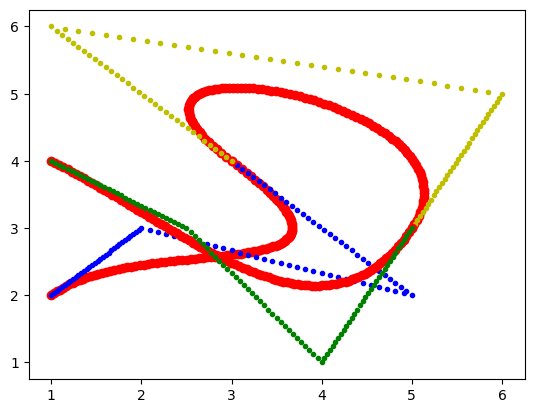

In [123]:
# data and guide points for h_2(t)
cx2 = np.asarray([5,4,2.5,1])
cy2 = np.asarray([3.0,1.0,3.0,4.0])

cx1 = np.asarray([3,1,6,5])
cy1 = np.asarray([4,6,5,3])
# evaluation of the three curve segments

yxs1 = piecewise_linear(t,cx1,tau)
yys1 = piecewise_linear(t,cy1,tau)
yxs2 = piecewise_linear(t,cx2,tau)
yys2 = piecewise_linear(t,cy2,tau)
xx1 = b(cx1, tau)
yy1 = b(cy1, tau)
xx2 = b(cx2, tau)
yy2 = b(cy2, tau)
# plot of the three curve segments

plt.plot(xx, yy, 'ro', yxs, yys, 'b.', xx1, yy1, 'ro', yxs1, yys1, 'y.', xx2, yy2, 'ro', yxs2, yys2, 'g.')
plt.show()

##### Sidenote:
The most popular way to evaluate Bezier curves (used in about every implementation) is the so-called De-Casteljau algorithm, a recursive method instead of the direct evaluation of Bernstein polynomials or the general polynomials as we did above. Extended to curves of higher degree it is numerically more stable but is computationally more expensive. It allows to evaluate a point on a curve by using only a sequence of linear approximations. It was invented in the 1960s for automotive design, back when engineers designed their cars with a pencil and ruler.   
The implementation below does the same as $b(c,x_{eval})$ if $c$ has 4 points. The number of points can be arbitrarily chosen, producing curves of higher degree with additional control points/ guide points

In [96]:
# given the same coefficients as for b(coefs,x_eval)
def de_casteljau(coeffs, x_eval):
    # start with the coefficients
    beta = list(coeffs) # values in this list are overridden
    n = len(beta)
    for j in range(1, n):
        for k in range(n - j):
            # in each recursive step the interval between two points is divided in two and a linear approximation is done
            beta[k] = beta[k] * (1 - x_eval) + beta[k + 1] * x_eval
    return beta[0]